# Statistical Modelling and Inference
## 

## Import all libraries and algorithms from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn import tree


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## 
## ------------------------------------------------------------------------------------------------------------------------------

# -------------------------------------  Heart Failure Dataset ---------------------------------------

## Predict the chances of Heart Failure based on the features.

## 
## Read the CSV file using Pandas

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

### Check shape of the data

In [3]:
df.shape

(299, 13)

### Information about every column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Print some of the data

In [5]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Check if we have any null values

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### We don't have any null values in our data..

### Description of the data

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### We can see that difference between the means of every column is remarkable..
### Same goes for the standar deviation..
### 

## Let's use get_dummies to encode our categorical columns

In [8]:
df = pd.get_dummies(df,columns=['anaemia','diabetes','high_blood_pressure','sex','smoking'],drop_first=True)
df.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,1,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,1,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,1,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,1,0,0,0


In [9]:
df.shape

(299, 13)

## Correlation matrix

In [10]:
cm = df.corr().round(2)
cm

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
age,1.00,-0.08,0.06,-0.05,0.16,-0.05,-0.22,0.25,0.09,-0.10,0.09,0.07,0.02
creatinine_phosphokinase,-0.08,1.00,-0.04,0.02,-0.02,0.06,-0.01,0.06,-0.19,-0.01,-0.07,0.08,0.00
ejection_fraction,0.06,-0.04,1.00,0.07,-0.01,0.18,0.04,-0.27,0.03,-0.00,0.02,-0.15,-0.07
platelets,-0.05,0.02,0.07,1.00,-0.04,0.06,0.01,-0.05,-0.04,0.09,0.05,-0.13,0.03
serum_creatinine,0.16,-0.02,-0.01,-0.04,1.00,-0.19,-0.15,0.29,0.05,-0.05,-0.00,0.01,-0.03
serum_sodium,-0.05,0.06,0.18,0.06,-0.19,1.00,0.09,-0.20,0.04,-0.09,0.04,-0.03,0.00
time,-0.22,-0.01,0.04,0.01,-0.15,0.09,1.00,-0.53,-0.14,0.03,-0.20,-0.02,-0.02
DEATH_EVENT,0.25,0.06,-0.27,-0.05,0.29,-0.20,-0.53,1.00,0.07,-0.00,0.08,-0.00,-0.01
anaemia_1,0.09,-0.19,0.03,-0.04,0.05,0.04,-0.14,0.07,1.00,-0.01,0.04,-0.09,-0.11
diabetes_1,-0.10,-0.01,-0.00,0.09,-0.05,-0.09,0.03,-0.00,-0.01,1.00,-0.01,-0.16,-0.15


## Graphical Representation of Correlation matrix

<AxesSubplot:>

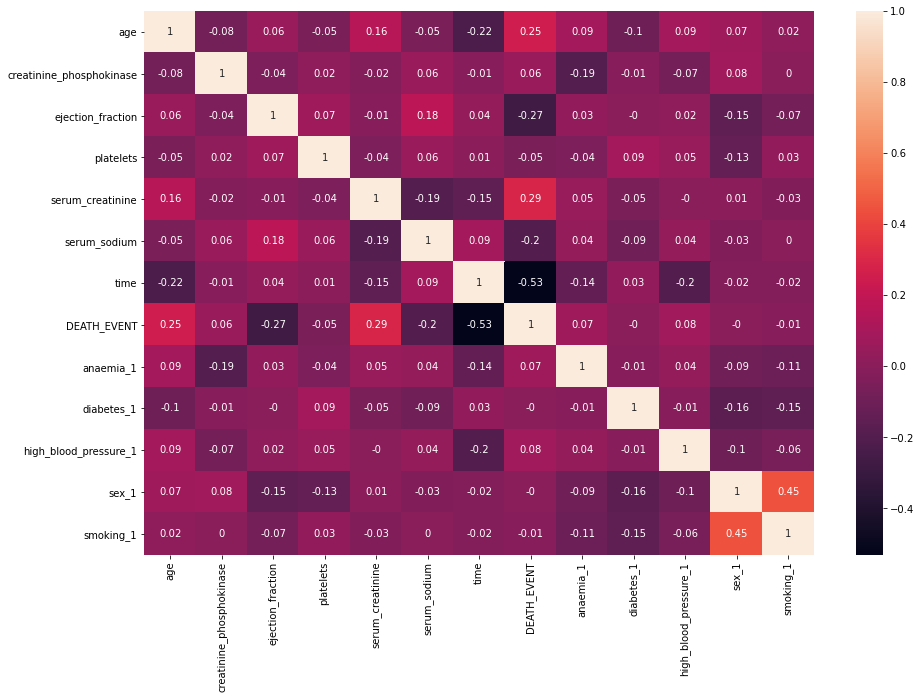

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

### We can see all columns are somehow related to the DEATH_EVENT column...
### 

In [12]:
cm['DEATH_EVENT'].sort_values()

time                       -0.53
ejection_fraction          -0.27
serum_sodium               -0.20
platelets                  -0.05
smoking_1                  -0.01
diabetes_1                 -0.00
sex_1                      -0.00
creatinine_phosphokinase    0.06
anaemia_1                   0.07
high_blood_pressure_1       0.08
age                         0.25
serum_creatinine            0.29
DEATH_EVENT                 1.00
Name: DEATH_EVENT, dtype: float64

### 
## Death event of different ages for 'male' & 'female'

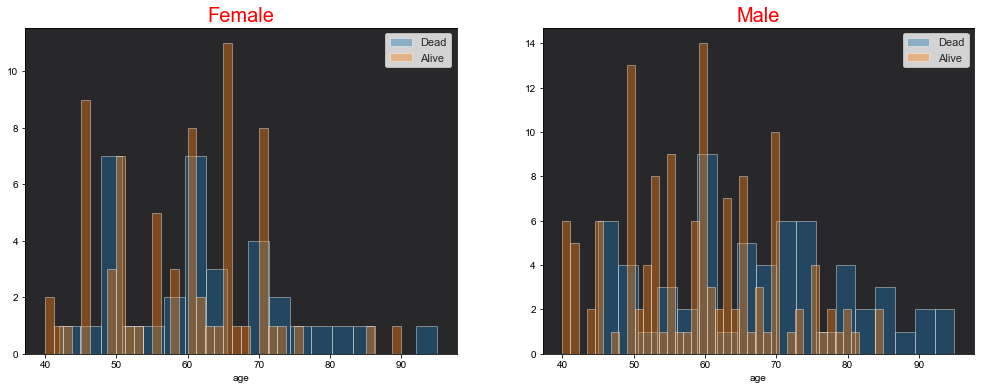

In [13]:
female = df[df['sex_1']==0]
male = df[df['sex_1']==1]

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17, 6))

sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'white'})

ax = sns.distplot(female[female['DEATH_EVENT']==1]['age'], bins=18, label = "Dead", ax = axes[0], kde =False)
ax = sns.distplot(female[female['DEATH_EVENT']==0]['age'], bins=40, label = "Alive", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female',size=20,color='red')
ax.set_facecolor('#28282B')


ax = sns.distplot(male[male['DEATH_EVENT']==1]['age'], bins=18, label = "Dead", ax = axes[1], kde = False)
ax = sns.distplot(male[male['DEATH_EVENT']==0]['age'], bins=40, label = "Alive", ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male',size=20,color='red')
ax.set_facecolor('#28282B')

### We can see that death rate is more in Male as compare to Female

## 
## Count of death for some columns

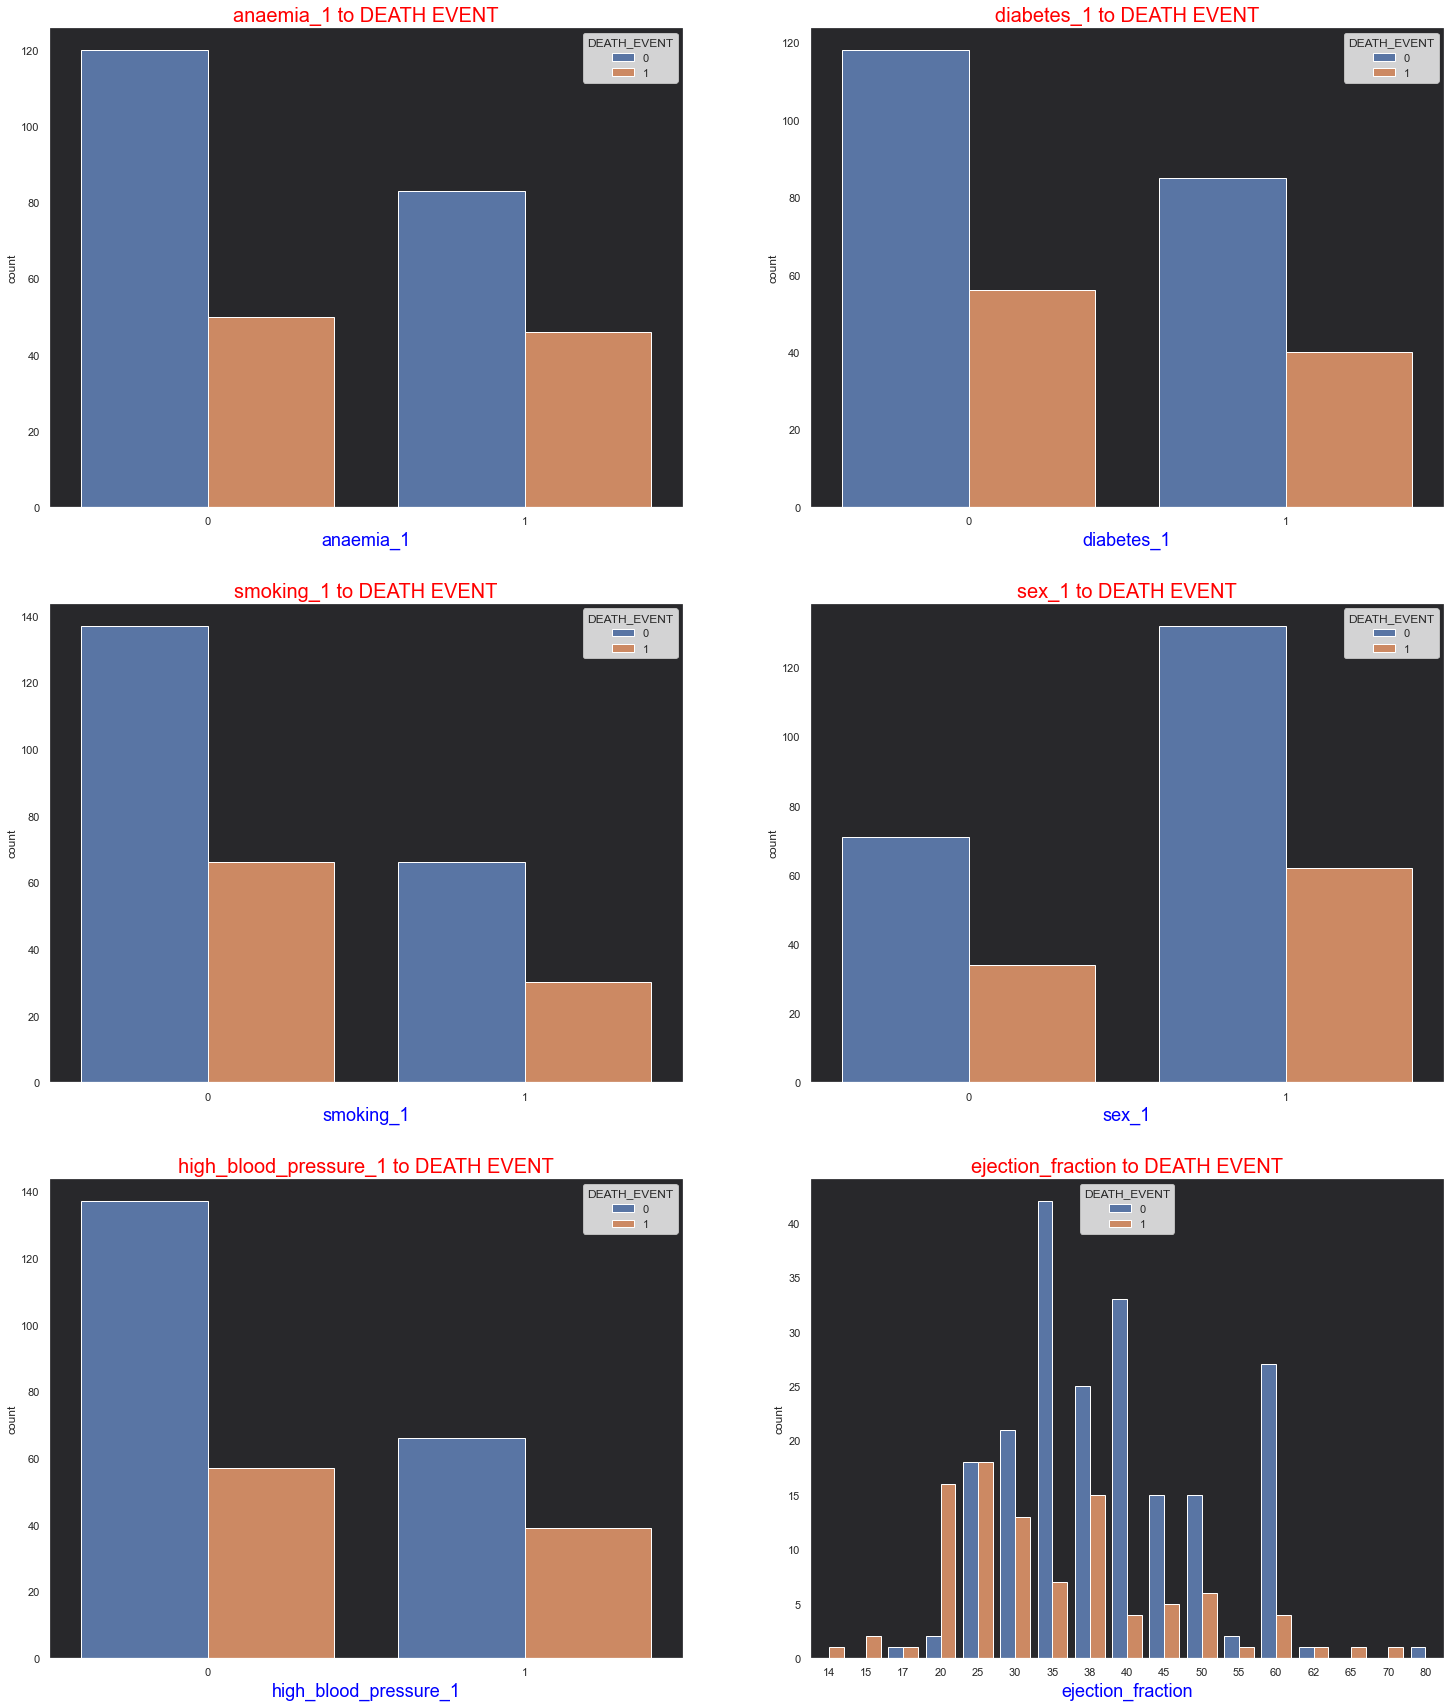

In [14]:
fig = plt.figure(figsize=(25,30))
xax = ['anaemia_1','diabetes_1','smoking_1','sex_1','high_blood_pressure_1','ejection_fraction']

sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'white'})

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    sns.countplot(df[xax[i]],hue=df['DEATH_EVENT'],ax=ax)
    ax.set_title(xax[i]+" to DEATH EVENT",size=20,color='red')
    ax.set_xlabel(xax[i],size=18,color='blue')
    ax.set_facecolor('#28282B')

### We can clearly see the difference between the number of count when someone smokes, has diabetes etc..
### 

## Snplot of some correlated columns 

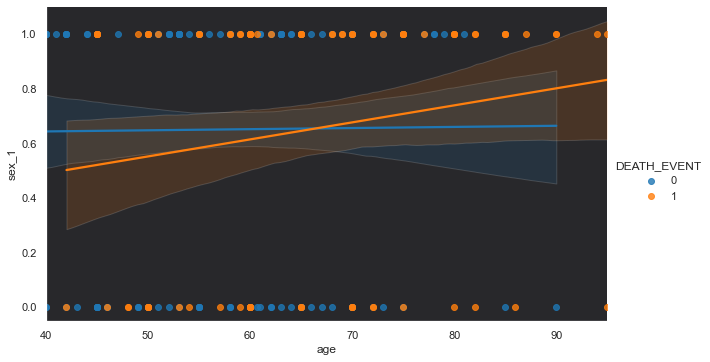

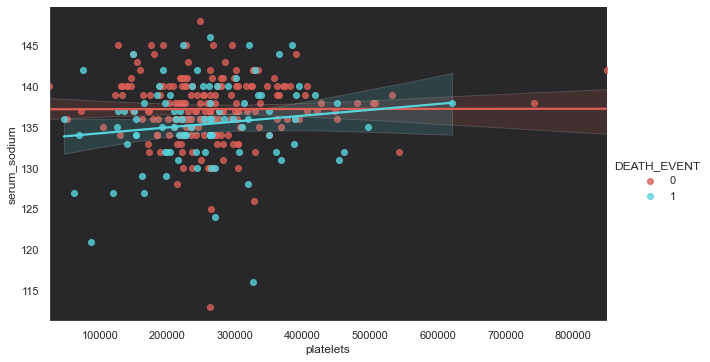

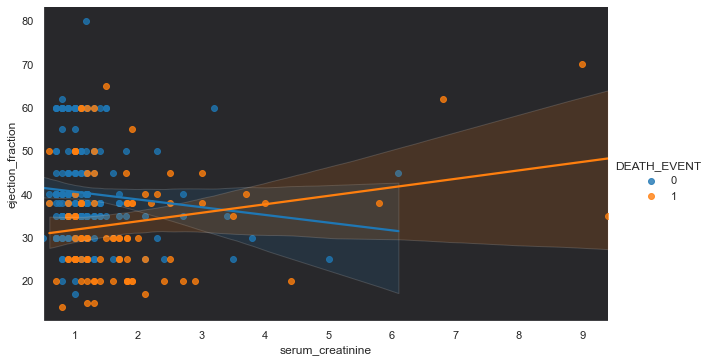

In [15]:
xax = ['anaemia_1','diabetes_1','smoking_1','sex_1','high_blood_pressure_1','ejection_fraction']

sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'#28282B'})

sns.lmplot('age', 'sex_1', data=df,  
             palette=sns.color_palette('tab10', n_colors=2),  hue = 'DEATH_EVENT', 
           fit_reg=True,size=5,aspect=1.7 )

sns.lmplot('platelets', 'serum_sodium', data=df,  
             palette=sns.color_palette('hls', n_colors=2),  hue = 'DEATH_EVENT', fit_reg=True,size=5,aspect=1.7)

sns.lmplot('serum_creatinine', 'ejection_fraction', data=df,  
             palette=sns.color_palette('tab10', n_colors=2),  hue = 'DEATH_EVENT', fit_reg=True,size=5,aspect=1.7 )

### We can see the relation between the columns and the effect of those value to the death rate
### 

## Distplot of independent columns

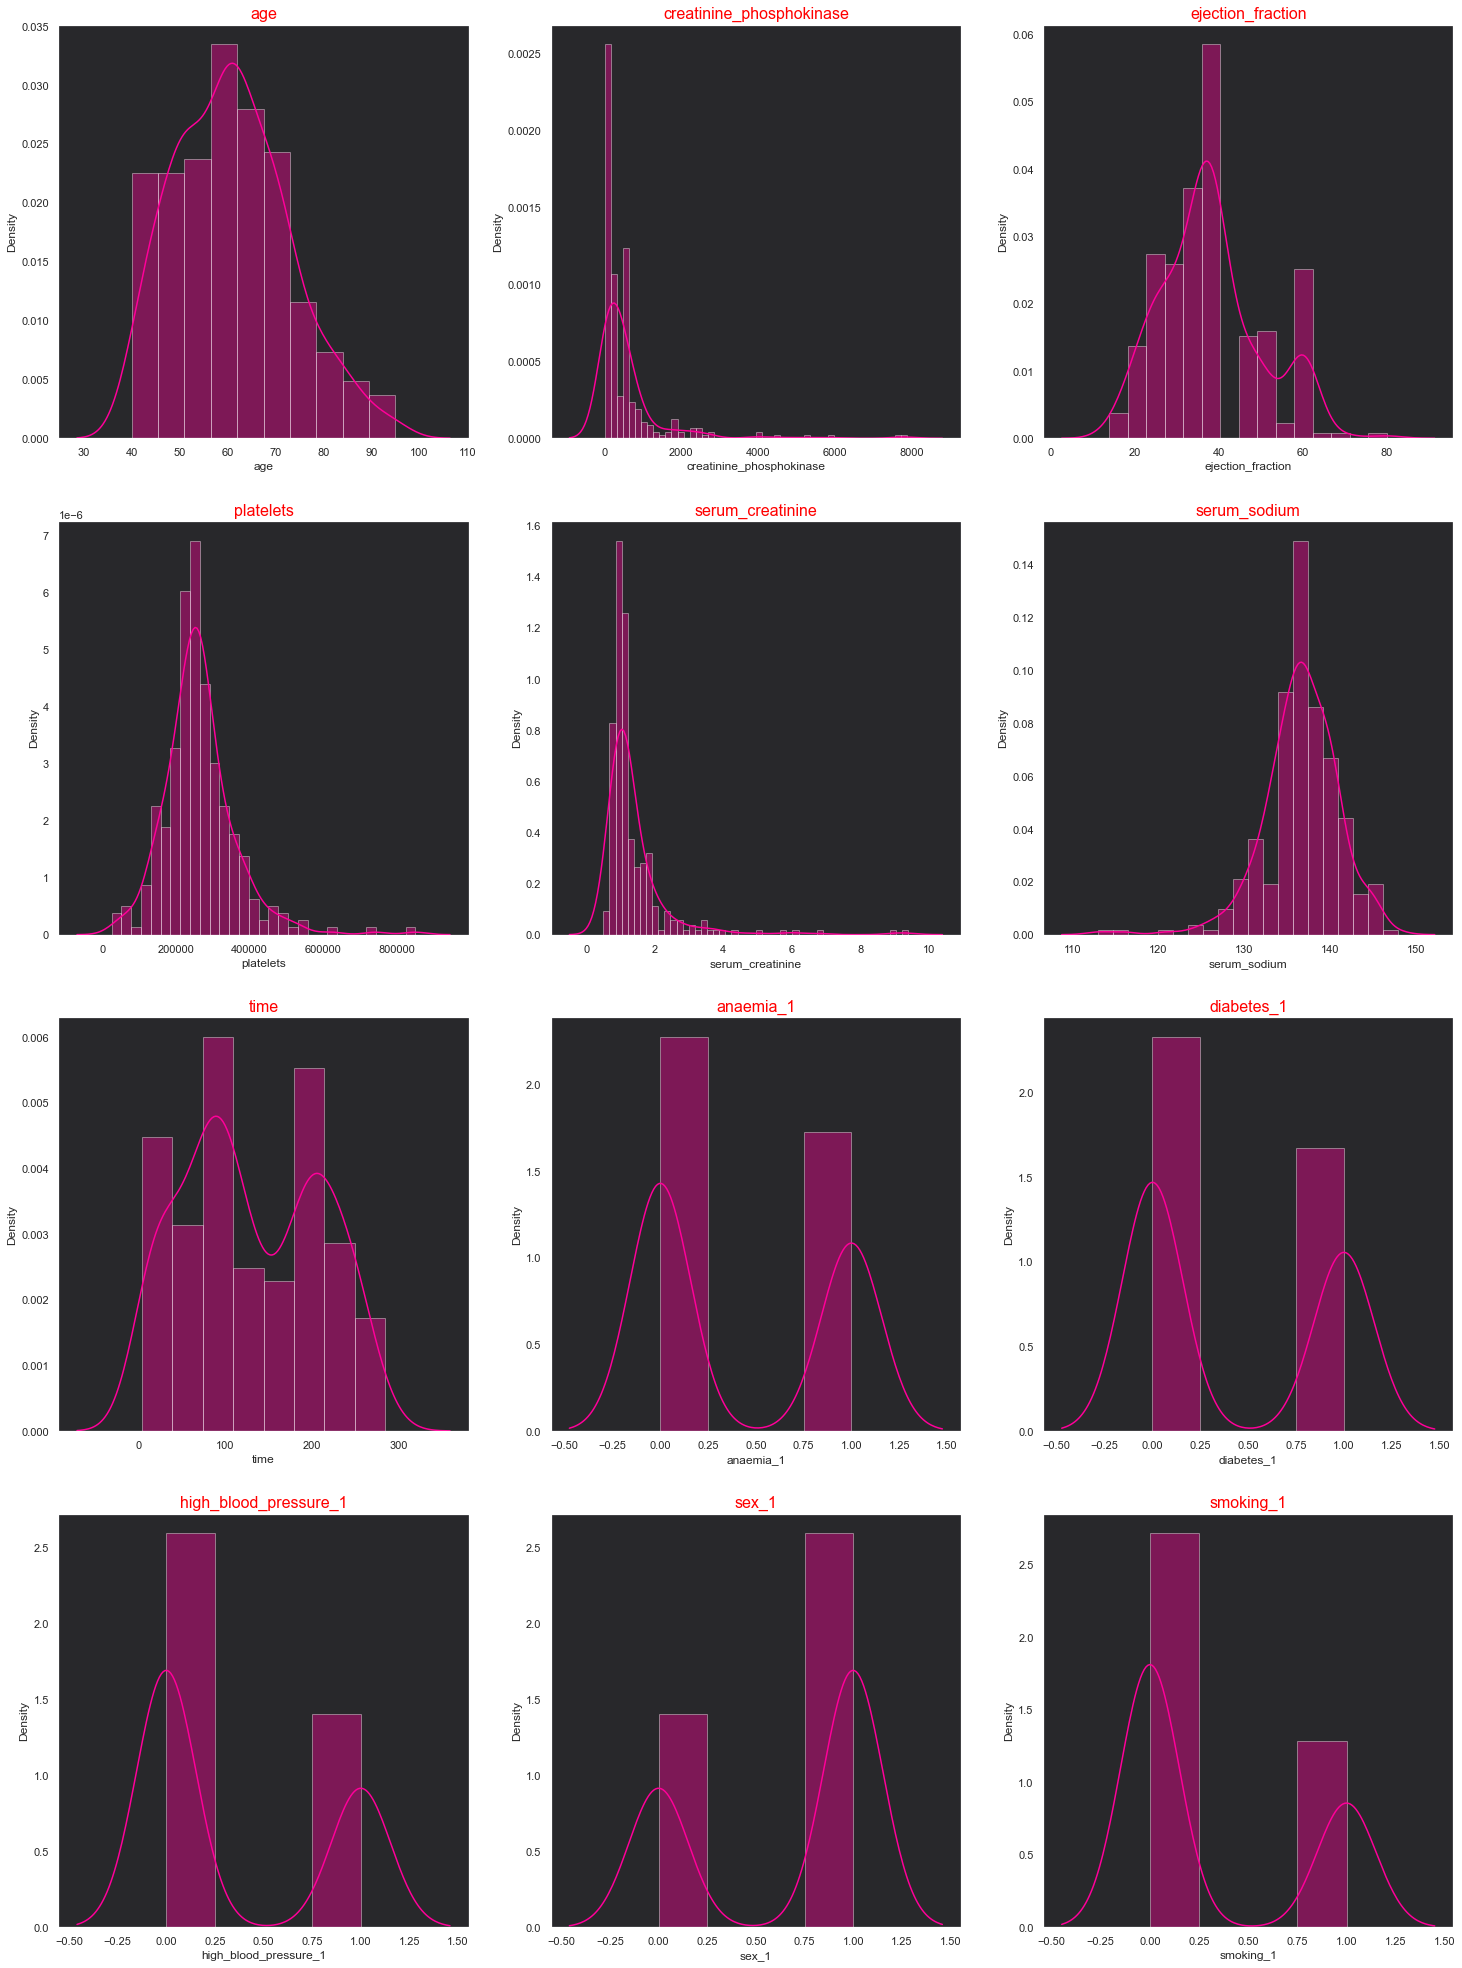

In [16]:
fig,axes = plt.subplots(4,3,figsize=(25,35))
dis = {}

l = list(df.columns)
l.remove('DEATH_EVENT')

for i,ax in enumerate(axes.ravel()):
    sns.distplot(df[l[i]], color='#FF0099' ,ax=ax)
    ax.set_title(l[i],color='red',size=16)

    dis[l[i]] = [ df[l[i]].skew(), df[l[i]].kurt() ]
    
    #print('Skewness: %f' % df[l[i]].skew())
    #print("Kurtosis: %f" % df[l[i]].kurt())
    ax.set_facecolor('#28282B')

### Column values are not in same range... there is a lot of difference in every column values...
### There are some outliers too.
### 

## Skewness and kurtosis of above graph

In [17]:
dis = pd.DataFrame(dis,index=['Skewness','Kurtosis'])
dis.T

,Skewness,Kurtosis
age,0.423062,-0.184871
creatinine_phosphokinase,4.463110,25.149046
ejection_fraction,0.555383,0.041409
platelets,1.462321,6.209255
serum_creatinine,4.455996,25.828239
serum_sodium,-1.048136,4.119712
time,0.127803,-1.212048
anaemia_1,0.278261,-1.935563
diabetes_1,0.333929,-1.901254
high_blood_pressure_1,0.626732,-1.618076


## 
## Boxplot of the independent columns

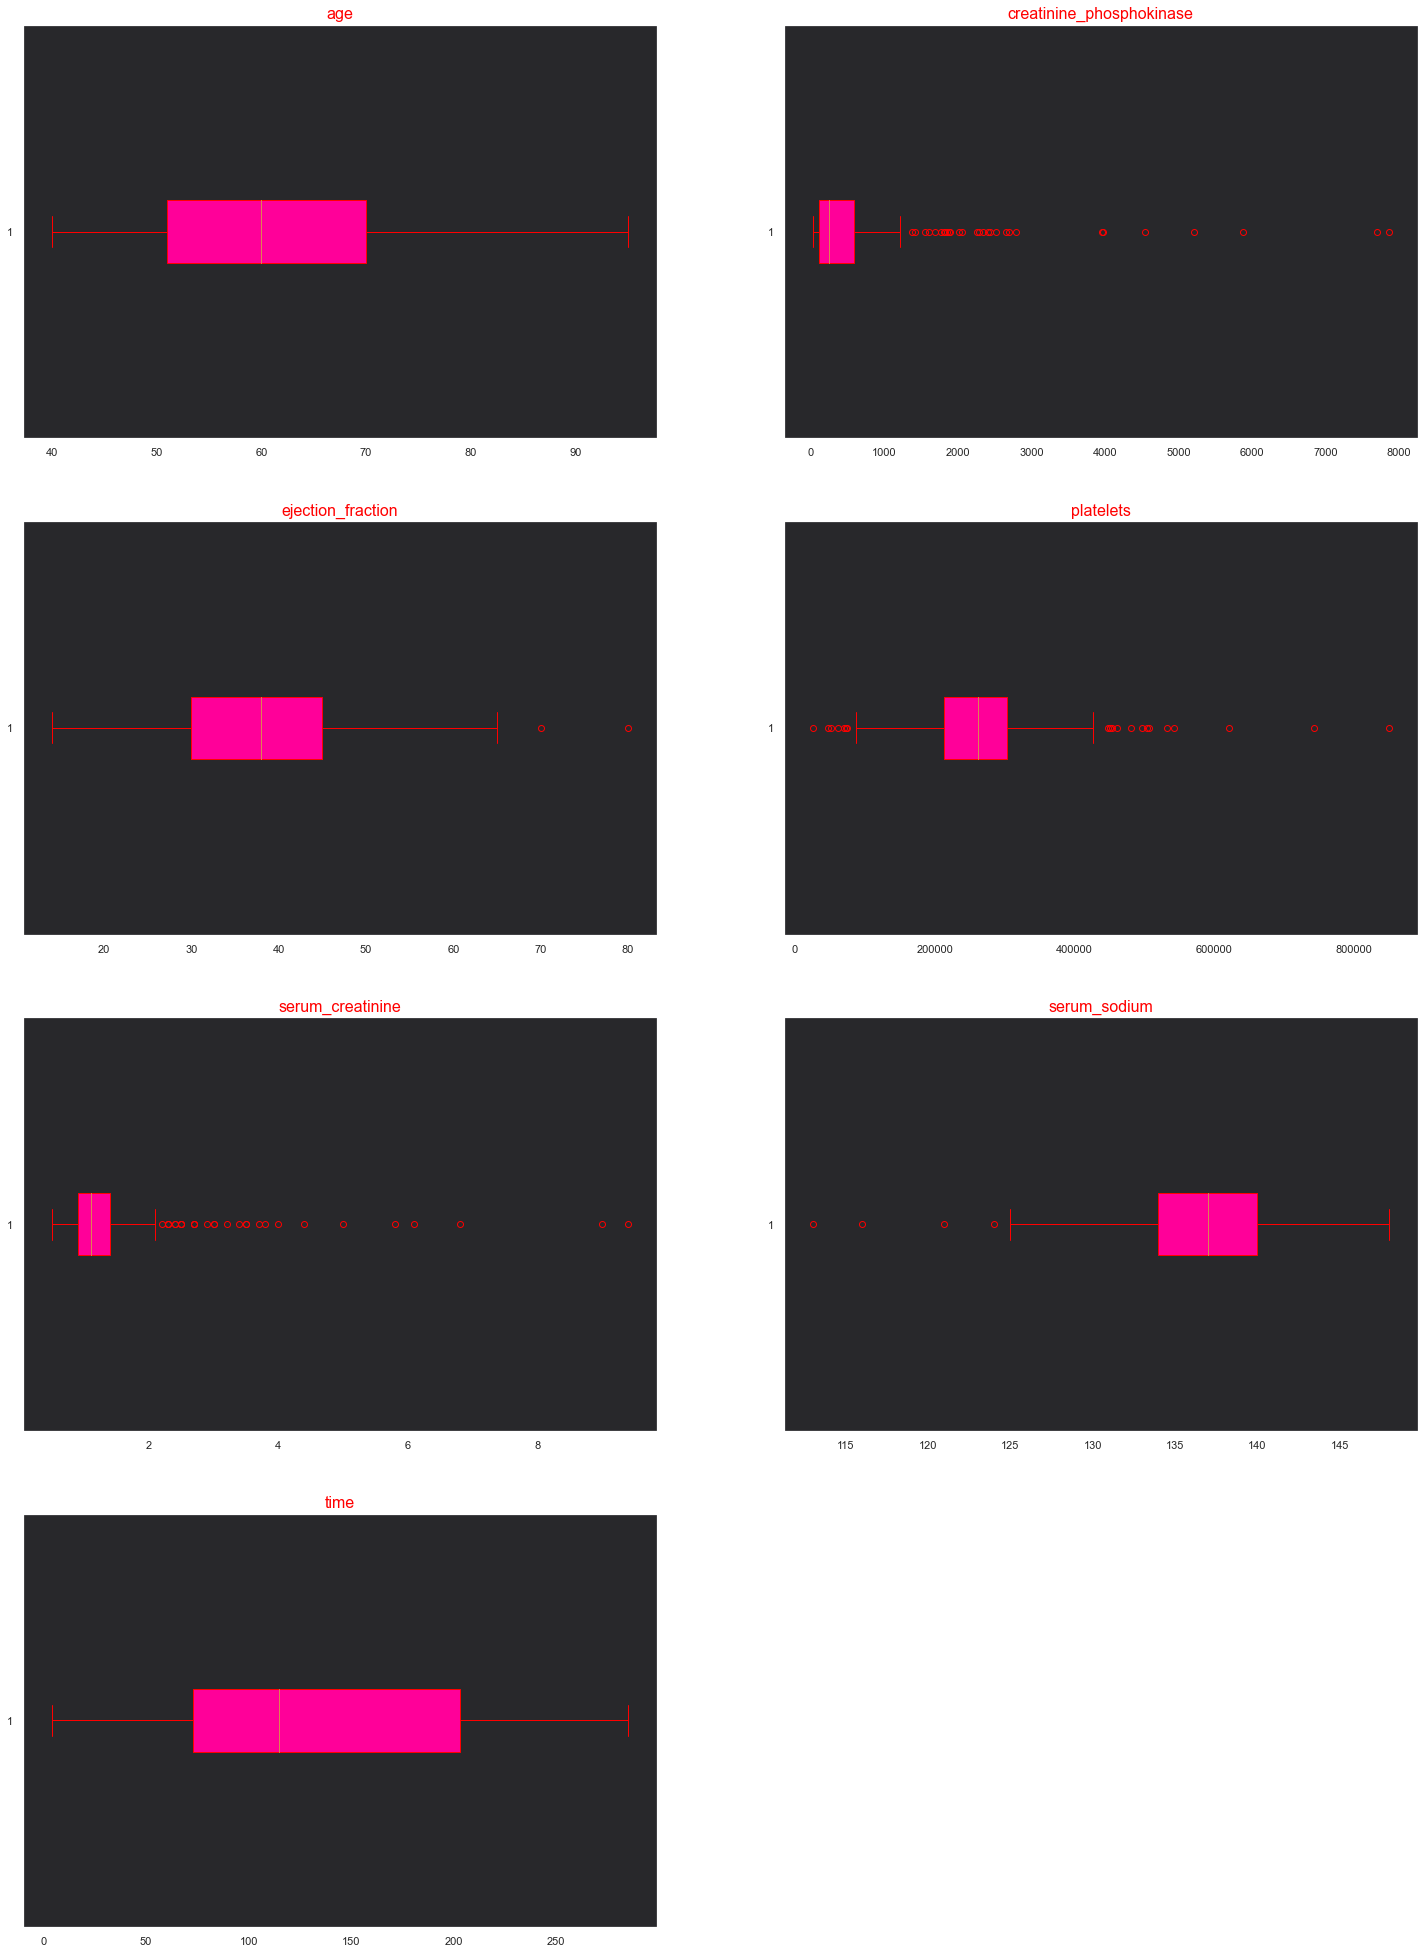

In [18]:
fig = plt.figure(figsize=(25,35))

for i in range(7):
    ax = fig.add_subplot(4,2,i+1)
    #sns.boxplot(df[l[i]], color='#FF0099', ax=ax)
    ax.boxplot(df[l[i]],vert=False, patch_artist=True,boxprops=dict(facecolor='#FF0099', color='red'),capprops=dict(color='red'),whiskerprops=dict(color='red'),flierprops=dict(color='red', markeredgecolor='red') )
    ax.set_title(l[i],color='red',size=16)
    ax.set_facecolor('#28282B')

### There are some outliers in some of the columns.. 

## 
## Create a variable with all independent columns
## & other with dependent column (Target Column)

In [19]:
#Y = np.array(df.loc[:,'DEATH_EVENT'])
#X =  np.array(df.loc[:,df.columns!='DEATH_EVENT'])

Y = df.loc[:,'DEATH_EVENT']
X = df.loc[:,df.columns!='DEATH_EVENT']

In [20]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
0,75.0,582,20,265000.00,1.9,130,4,0,0,1,1,0
1,55.0,7861,38,263358.03,1.1,136,6,0,0,0,1,0
2,65.0,146,20,162000.00,1.3,129,7,0,0,0,1,1
3,50.0,111,20,210000.00,1.9,137,7,1,0,0,1,0
4,65.0,160,20,327000.00,2.7,116,8,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270,0,1,1,1,1
295,55.0,1820,38,270000.00,1.2,139,271,0,0,0,0,0
296,45.0,2060,60,742000.00,0.8,138,278,0,1,0,0,0
297,45.0,2413,38,140000.00,1.4,140,280,0,0,0,1,1


In [21]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

## Check mean of every column

In [22]:
X.mean(axis=0)

age                             60.833893
creatinine_phosphokinase       581.839465
ejection_fraction               38.083612
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
time                           130.260870
anaemia_1                        0.431438
diabetes_1                       0.418060
high_blood_pressure_1            0.351171
sex_1                            0.648829
smoking_1                        0.321070
dtype: float64

## Check the standard deviation of every column

In [23]:
X.std()

age                            11.894809
creatinine_phosphokinase      970.287881
ejection_fraction              11.834841
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
time                           77.614208
anaemia_1                       0.496107
diabetes_1                      0.494067
high_blood_pressure_1           0.478136
sex_1                           0.478136
smoking_1                       0.467670
dtype: float64

### Difference between mean and std is very high.. We need to transform our data

## 
## Robust Scaler to transform data

In [24]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

In [25]:
X = rs.fit_transform(X)

### Now, check the mean again

In [26]:
X.mean(axis=0)

array([ 0.0438891 ,  0.71286673,  0.00557414,  0.0149234 ,  0.5877592 ,
       -0.06243032,  0.1173913 ,  0.43143813,  0.4180602 ,  0.35117057,
       -0.35117057,  0.32107023])

### Standard Deviation again

In [27]:
X.std(axis=0)

array([0.62499481, 2.08091078, 0.7876689 , 1.07297305, 2.06555733,
       0.73418206, 0.59603315, 0.49527696, 0.49324017, 0.47733615,
       0.47733615, 0.46688772])

### Now, we can see that mean of every colum is close to each other and same for the standard deviation..

## 
## Split the datasets into 'Train' & 'Test' sets

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### Check shape

In [29]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(239, 12)
(60, 12)
(239,)
(60,)


## Check the Null Hypothesis

In [30]:
import scipy.stats as stats

### We will use t-test to check our p-value and determine the null hypothesis

In [31]:
ttest = {}

for i in range(X_train.shape[1]):
    xm = X[:,i].mean(axis=0)
    #print(xm)
    st,pvalue = stats.ttest_1samp(a=X_train[:,i],popmean=xm)
    
    if pvalue <= 0.05:
        #print('Reject')
        ttest[l[i]] = [st,pvalue,'Reject'] 
    else:
        #print('Accept')
        ttest[l[i]] = [st,pvalue,'Accept'] 
    
ttest = pd.DataFrame(ttest,index=['Statistic','Pvalue','Accept/Reject'])
ttest.T

,Statistic,Pvalue,Accept/Reject
age,-0.765349,0.444822,Accept
creatinine_phosphokinase,-1.75623,0.0803355,Accept
ejection_fraction,-0.403622,0.686853,Accept
platelets,0.363406,0.716624,Accept
serum_creatinine,-0.566286,0.571733,Accept
serum_sodium,0.0832474,0.933725,Accept
time,0.787163,0.431969,Accept
anaemia_1,-0.407436,0.684054,Accept
diabetes_1,0.1416,0.887516,Accept
high_blood_pressure_1,0.00949579,0.992432,Accept


### We can see, by the 'Pvalue', we can accept all the null hypothesis

## 
## Check the Displot again (For Training dataset)

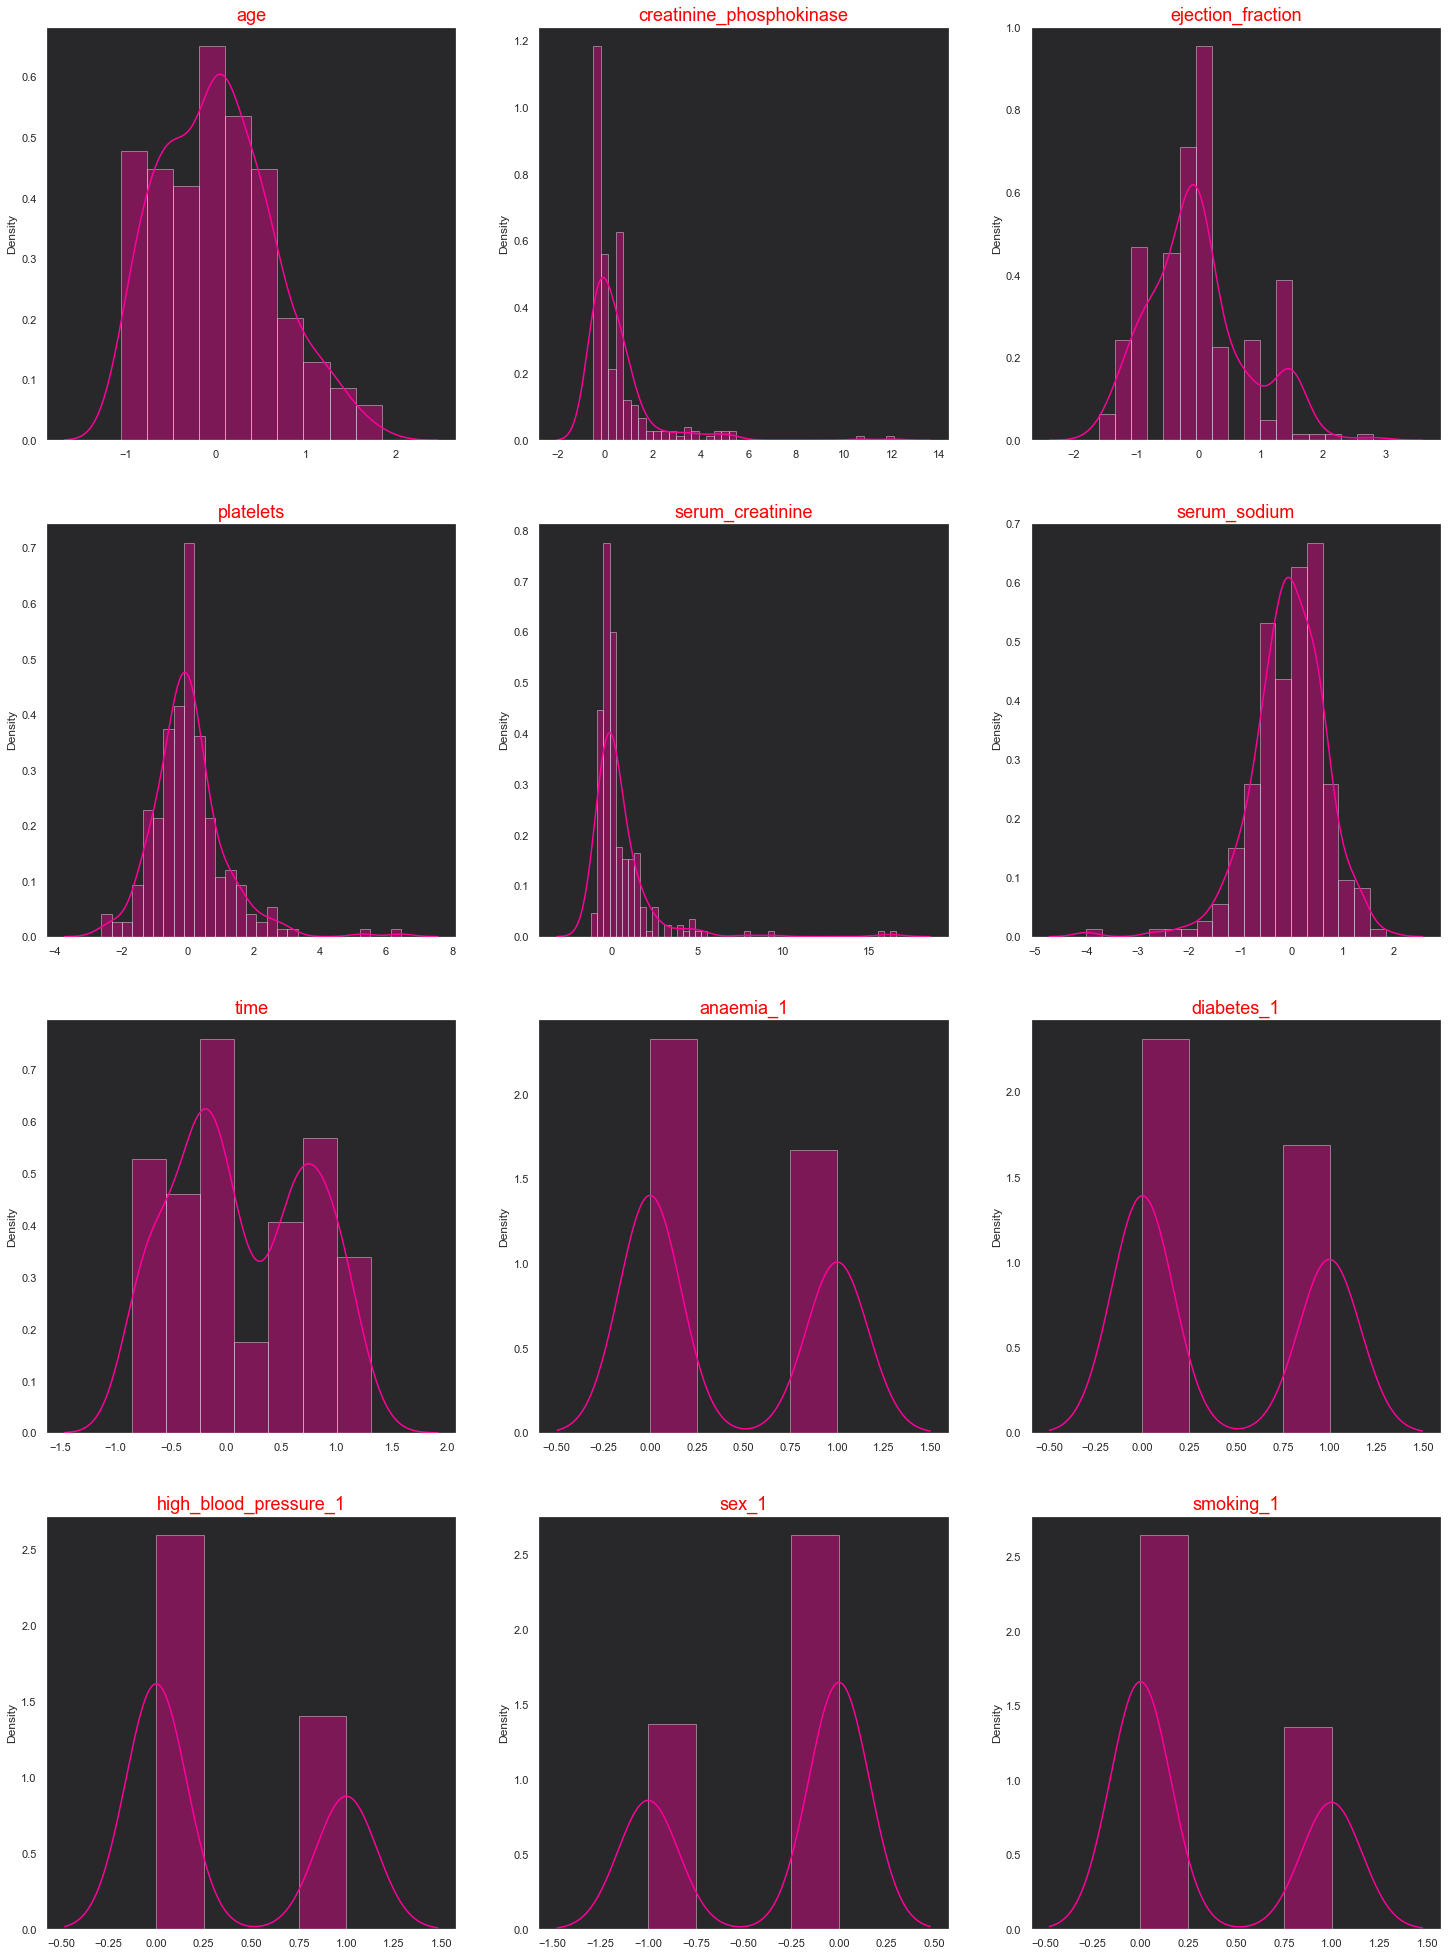

In [32]:
fig,axes = plt.subplots(4,3,figsize=(25,35))

l = list(df.columns)
l.remove('DEATH_EVENT')

for i,ax in enumerate(axes.ravel()):
    sns.distplot(X_train[:,i], color='#FF0099' ,ax=ax)
    ax.set_title(l[i],color='red',size=18)
    ax.set_facecolor('#28282B')

## 
# Train the models

## Logistic Regression

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
Y_predict_log = log_model.predict(X_test)

## SVC algorithm 'linear' kernel

In [34]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_predict_linear = svc_linear.predict(X_test)

## SVC algorithm 'Gaussian rbf' kernel

In [35]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, Y_train)
Y_predict_rbf = svc_rbf.predict(X_test)

### Check the predicted data and compare

In [36]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
     'Logistic Algo':Y_predict_log[:7],
     'SVC Linear':Y_predict_linear[:7],
     'SVC Gaussian RBF':Y_predict_rbf[:7]}
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,Logistic Algo,SVC Linear,SVC Gaussian RBF
41,Value1,1,1,1,0
187,Value2,1,0,0,0
252,Value3,0,0,0,0
205,Value4,0,0,0,0
136,Value5,0,0,0,0
26,Value6,1,1,1,1
52,Value7,1,1,1,0


### We can see there is not much difference in every algorithm's output

## 
# Evaluation Matrix

In [37]:
matrix_evaluation = pd.DataFrame({'Kernal' :['Logistic','SVC Linear','SVC Gaussian RBF'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict_log),
                                        mean_absolute_error(Y_test,Y_predict_linear),
                                        mean_absolute_error(Y_test,Y_predict_rbf)], 
                                'MSE': [mean_squared_error(Y_test,Y_predict_log),
                                        mean_squared_error(Y_test,Y_predict_linear),
                                        mean_squared_error(Y_test,Y_predict_rbf)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict_log)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_linear)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_rbf))],
                                    'R2_score': [r2_score(Y_test,Y_predict_log),          
                                                 r2_score(Y_test,Y_predict_linear),
                                                 r2_score(Y_test,Y_predict_rbf)],
                                 'Accuracy Score': [accuracy_score(Y_test,Y_predict_log),
                                                   accuracy_score(Y_test,Y_predict_linear),
                                                   accuracy_score(Y_test,Y_predict_rbf)] })


matrix_evaluation

,Kernal,MAE,MSE,RMSE,R2_score,Accuracy Score
0,Logistic,0.183333,0.183333,0.428174,0.245714,0.816667
1,SVC Linear,0.166667,0.166667,0.408248,0.314286,0.833333
2,SVC Gaussian RBF,0.233333,0.233333,0.483046,0.040000,0.766667


### By evaluation matrix, it is clear that Logistic Regression is most accurate algorithm.
### It gives less errors as compared to other algorithms.

# 
# Confusion Matrix

In [38]:
cml = confusion_matrix(Y_test, Y_predict_log)
cmp = confusion_matrix(Y_test, Y_predict_linear)
cmg = confusion_matrix(Y_test, Y_predict_rbf)


print("\nConfusion matrix of Logistic Regression:\n",cml)
print("\n\nConfusion matrix of SVC Linear Kernel:\n",cmp)
print("\n\nConfusion matrix of SVC Gaussian rbf Kernel:\n",cmg)


Confusion matrix of Logistic Regression:
 [[31  4]
 [ 7 18]]


Confusion matrix of SVC Linear Kernel:
 [[31  4]
 [ 6 19]]


Confusion matrix of SVC Gaussian rbf Kernel:
 [[33  2]
 [12 13]]


### SVC Linear kernel algorithm gives more true values than other..
### 

### Visualization of Confusion matrix

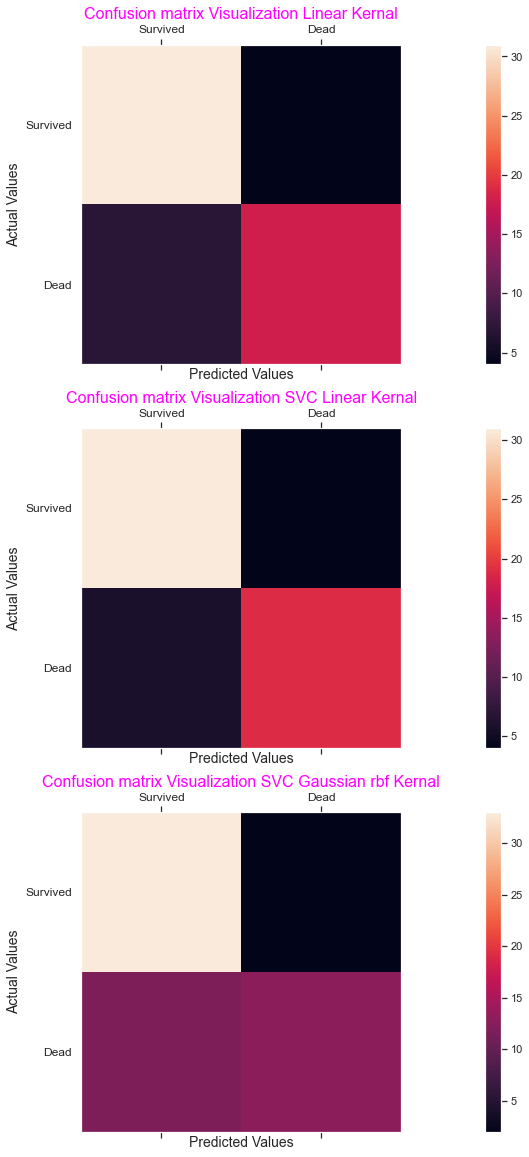

In [39]:
cm = [cml,cmp,cmg]
kname = ['Linear','SVC Linear','SVC Gaussian rbf']
labels = ['Survived','Dead']


fig = plt.figure(figsize=(30,20))

for i in range(0,3):
    axes = fig.add_subplot(3,1,i+1)
    mv = axes.matshow(cm[i])
    axes.set_title('Confusion matrix Visualization '+kname[i]+' Kernal',size='16',color='magenta')
    fig.colorbar(mv)
    axes.set_xticklabels([''] + labels,size='12')
    axes.set_yticklabels([''] + labels,size='12')
    axes.set_xlabel('Predicted Values',size='14')
    axes.set_ylabel('Actual Values',size='14')

## 
# Classification Report

In [40]:
crl = classification_report(Y_test,Y_predict_log,target_names=labels)
crp = classification_report(Y_test,Y_predict_linear,target_names=labels)
crg = classification_report(Y_test,Y_predict_rbf,target_names=labels)

print("\n\nClassification Report of Logistic Algorithm: \n\n",crl)
print("\n\nClassification Report of SVC linear kernel: \n\n",crp)
print("\n\nClassification Report of SVC Gaussian rbf Kernel: \n\n",crg)



Classification Report of Logistic Algorithm: 

               precision    recall  f1-score   support

    Survived       0.82      0.89      0.85        35
        Dead       0.82      0.72      0.77        25

    accuracy                           0.82        60
   macro avg       0.82      0.80      0.81        60
weighted avg       0.82      0.82      0.81        60



Classification Report of SVC linear kernel: 

               precision    recall  f1-score   support

    Survived       0.84      0.89      0.86        35
        Dead       0.83      0.76      0.79        25

    accuracy                           0.83        60
   macro avg       0.83      0.82      0.83        60
weighted avg       0.83      0.83      0.83        60



Classification Report of SVC Gaussian rbf Kernel: 

               precision    recall  f1-score   support

    Survived       0.73      0.94      0.83        35
        Dead       0.87      0.52      0.65        25

    accuracy                

## 
# Prediction Time..!
### Choose random data and check the output

#### Check the independent data

In [41]:
import random 
random.seed(7889)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(X))

# Selects a random column with random number we found above
trail = X[random_num]

trail

#df.loc[:,'Survived'][random_num]
#df.iloc[random_num]['Survived']

array([ 0.        , -0.39097744, -1.2       , -1.57142857,  3.6       ,
       -1.66666667, -0.39230769,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [42]:
print(X_test.shape)
print(trail.shape)

(60, 12)
(12,)


#### Reshape data

In [43]:
trail = trail.reshape(1,-1)
trail.shape

(1, 12)

### Predict and Compare it with every Algorithm

In [44]:
Y.iloc[random_num]

1

In [45]:
pred = pd.DataFrame({'Type': ['Actual value', 'Logistic Algo', 'SVC Linear','SVC Gaussian rbf'],
                         'Value': [Y.iloc[random_num], 
                                   log_model.predict(trail)[0],
                                   svc_linear.predict(trail)[0],
                                   svc_rbf.predict(trail)[0]
                                  ]})

pred

,Type,Value
0,Actual value,1
1,Logistic Algo,1
2,SVC Linear,1
3,SVC Gaussian rbf,1


## 
# Compare model based on hypothesis testing

### 
## For our test dataset, we will use our two best algorithms among three which we used..
### We will check if they have probably same performance or different...

In [46]:
#pip install mlxtend

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=log_model, estimator2=svc_linear, X=X_test, y=Y_test)
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

if p <= 0.05:
    print('\nDifference between performance is probably real')
else:
    print('\nAlgorithms probably have the same performance')

P-value: 0.595, t-Statistic: -0.568

Algorithms probably have the same performance


### 
### We can see that, the difference between the model performance is not much...
## We can use either of the model for our dataset.
## But by looking at the accuracy, we will use Logistic Regression model..

# 

## ------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------  Titanic Dataset -------------------------------------------

## Read 'Titanic Dataset' using Pandas

In [48]:
df = pd.read_csv('Titanic_data.csv')

### Check the shape

In [49]:
df.shape

(891, 12)

### Get information about the dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Print some of data

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describe the dataset

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### We can see that difference between the means of every column is remarkable..
### Same goes for the standar deviation..
### 

### Check if we have any null values in our data

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Drop null values of 'Age' Column
### Drop PassengerId column

In [54]:
df = df[df['Age'].notna()]
df = df.drop(['PassengerId'],axis=1)

#### Check again

In [55]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       529
Embarked      2
dtype: int64

#### Check shape again

In [56]:
df.shape

(714, 11)

### 
## Let's use get_dummies to encode our categorical column 'Sex'

In [57]:
df = pd.get_dummies(df,columns=['Sex'],drop_first=True)

df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q,0
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


# 
# Correlation Matrix

In [58]:
cm = df.corr()
cm

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994
Sex_male,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000


## Visualization of Correlation matrix

<AxesSubplot:>

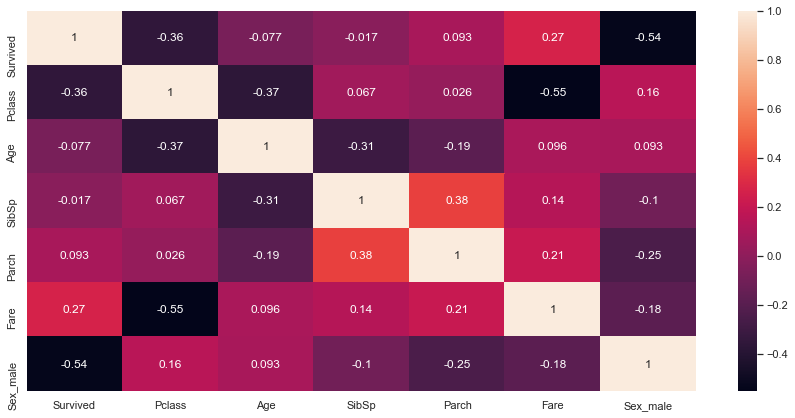

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True)

### We can see that Pclass, Sex_male are highly correlated to our dependent dataset ('Survived')

In [60]:
cm['Survived'].sort_values()

Sex_male   -0.538826
Pclass     -0.359653
Age        -0.077221
SibSp      -0.017358
Parch       0.093317
Fare        0.268189
Survived    1.000000
Name: Survived, dtype: float64

## 
## Countplot of 'Pclass & Survived' and 'Sex_male & Survived'

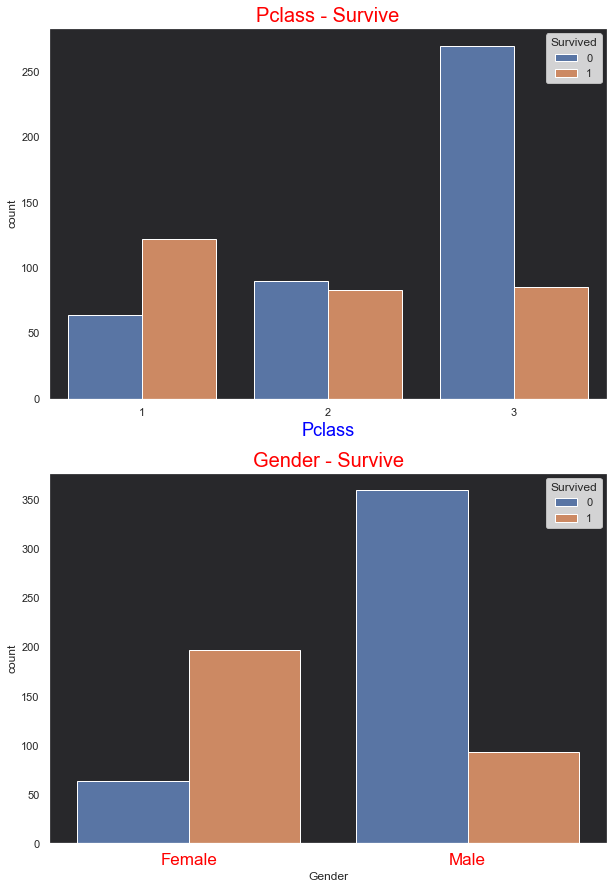

In [61]:
fig = plt.figure(figsize=(10,15))
xax = ['Pclass','Sex_male']

sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'white'})


ax = fig.add_subplot(2,1,1)
sns.countplot(df['Pclass'],hue=df['Survived'],ax=ax)
ax.set_title("Pclass - Survive",size=20,color='red')
ax.set_xlabel("Pclass",size=18,color='blue')
ax.set_facecolor('#28282B')

ax = fig.add_subplot(2,1,2)
sns.countplot(df['Sex_male'],hue=df['Survived'],ax=ax)
ax.set_xticklabels(['Female','Male'],size=17,color='red')
ax.set_xlabel('Gender')
ax.set_title('Gender - Survive',size=20,color='red')
ax.set_facecolor('#28282B')

### We can clearly see that, 
## 1st class passengers have higher chances of survival & 3rd class passengers have higher chances of death.
## For gender, Female have higher chances of survival and male have higher chances of death.
#### 

In [62]:
print(df.groupby(['Pclass','Sex_male'])['Survived'].value_counts())

Pclass  Sex_male  Survived
1       0         1            82
                  0             3
        1         0            61
                  1            40
2       0         1            68
                  0             6
        1         0            84
                  1            15
3       0         0            55
                  1            47
        1         0           215
                  1            38
Name: Survived, dtype: int64


#### Now, we can see the number of people survived from male and female
#### 

### Create a dataset with gender, age and survived

In [63]:
df_trail = df.loc[:, ['Sex_male', 'Age','Survived']]

df_trail

,Sex_male,Age,Survived
0,1,22.0,0
1,0,38.0,1
2,0,26.0,1
3,0,35.0,1
4,1,35.0,0
...,...,...,...
885,0,39.0,0
886,1,27.0,0
887,0,19.0,1
889,1,26.0,1


### 
### Create new datasets for male and female

In [64]:
female = df_trail[df_trail['Sex_male']==0]
male = df_trail[df_trail['Sex_male']==1]

print(female.head())

print(male.head())

   Sex_male   Age  Survived
1         0  38.0         1
2         0  26.0         1
3         0  35.0         1
8         0  27.0         1
9         0  14.0         1
    Sex_male   Age  Survived
0          1  22.0         0
4          1  35.0         0
6          1  54.0         0
7          1   2.0         0
12         1  20.0         0


## Comparison of survival based on 'Age' and 'Gender'

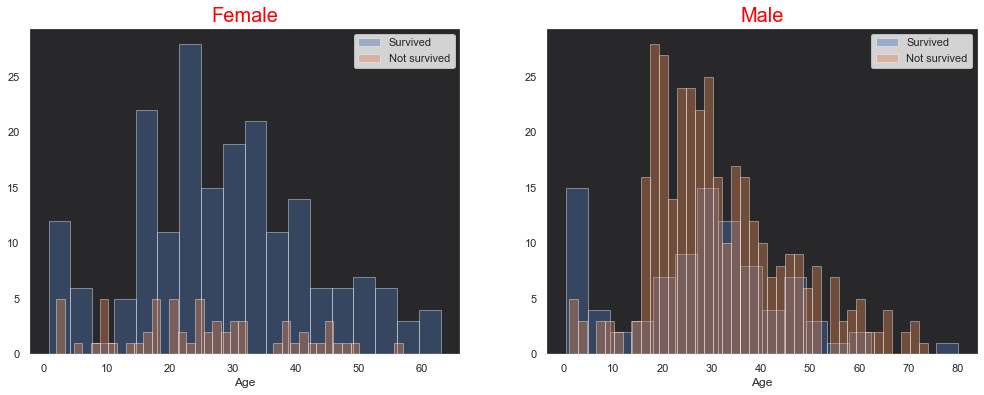

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(17, 6))

sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'white'})

ax = sns.distplot(female[female['Survived']==1]['Age'], bins=18, label = "Survived", ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0]['Age'], bins=40, label = "Not survived", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female',size=20,color='red')
ax.set_facecolor('#28282B')


ax = sns.distplot(male[male['Survived']==1]['Age'], bins=18, label = "Survived", ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0]['Age'], bins=40, label = "Not survived", ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male',size=20,color='red')
ax.set_facecolor('#28282B')

#### We can see that, female has higher chances of survival than male.
#### Male has higher chances of survival between 25 to 45 age.
#### 

### check the correlation of our three main columns 'Age',  'Sex_male', 'Pclass' using lmplot

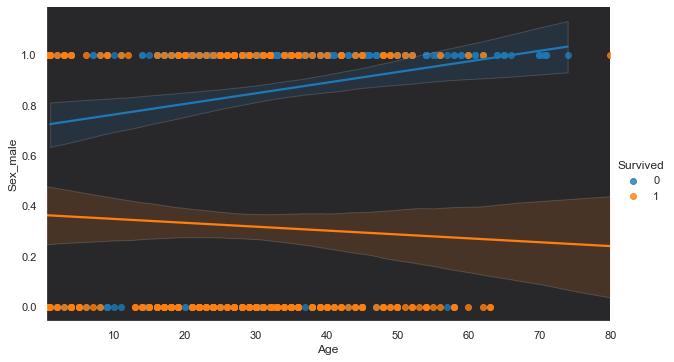

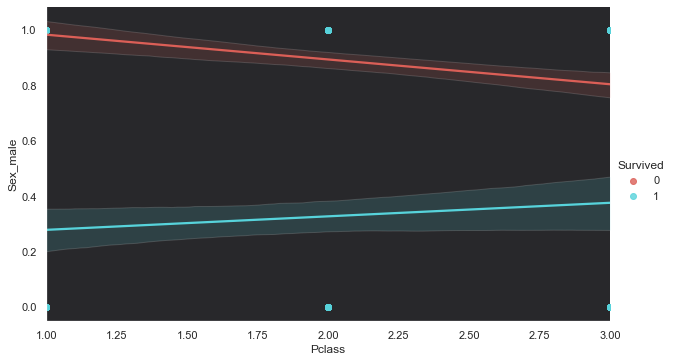

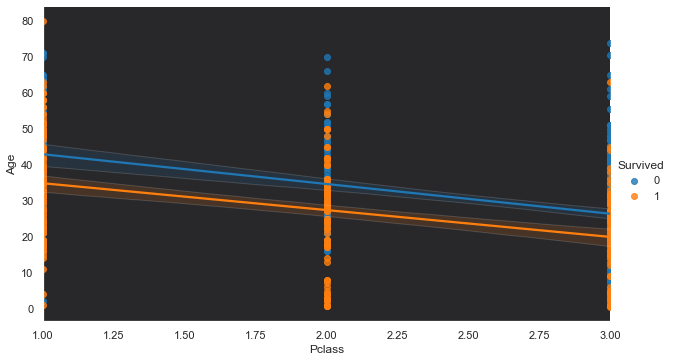

In [66]:
sns.set(rc={'figure.facecolor':'white','axes.grid' : False,'axes.facecolor':'#28282B'})

sns.lmplot('Age', 'Sex_male', data=df,  
             palette=sns.color_palette('tab10', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )

sns.lmplot('Pclass', 'Sex_male', data=df,  
             palette=sns.color_palette('hls', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )


sns.lmplot('Pclass', 'Age', data=df,  
             palette=sns.color_palette('tab10', n_colors=2),  hue = 'Survived', fit_reg=True,size=5,aspect=1.7 )

### We can see the relation between the columns and the effect of those value to the death rate
### 

## We will take 'Pclass', 'Age' & 'Sex_male' as our independent columns
### As they are highly correlated with our target column

## Distplot of independent columns

In [67]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_male'],
      dtype='object')

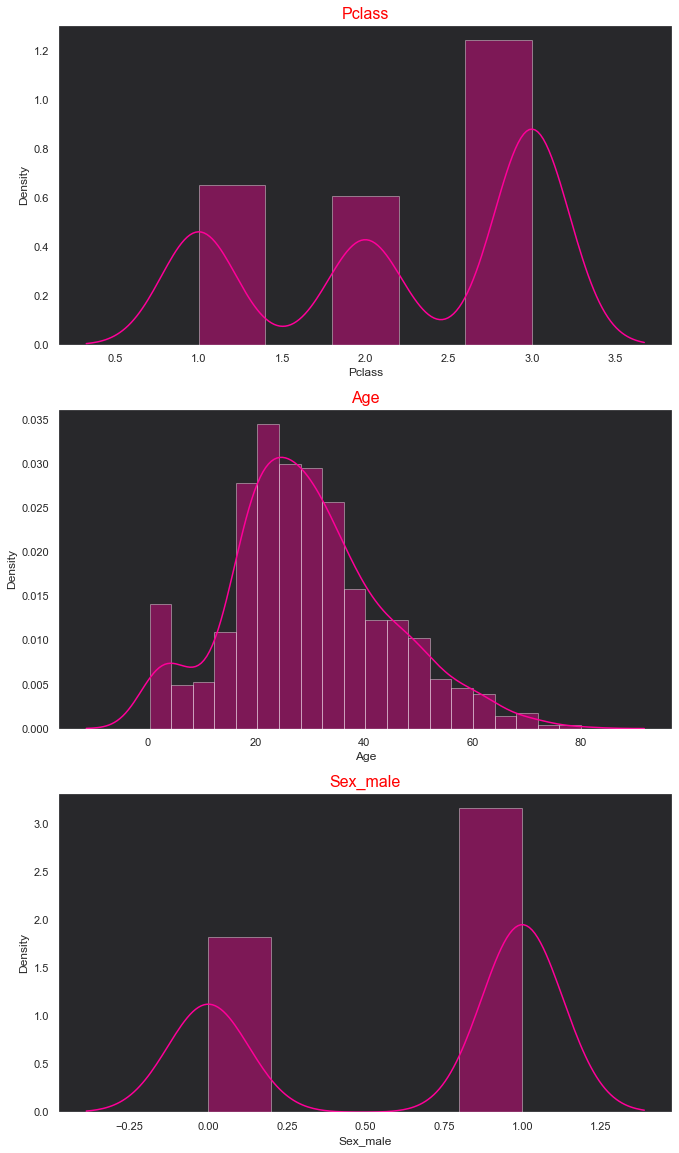

In [68]:
fig,axes = plt.subplots(3,1,figsize=(11,20))
dis = {}

l = ['Pclass','Age','Sex_male']

for i,ax in enumerate(axes.ravel()):
    sns.distplot(df[l[i]], color='#FF0099' ,ax=ax)
    ax.set_title(l[i],color='red',size=16)

    dis[l[i]] = [ df[l[i]].skew(), df[l[i]].kurt() ]
    
    #print('Skewness: %f' % df[l[i]].skew())
    #print("Kurtosis: %f" % df[l[i]].kurt())
    ax.set_facecolor('#28282B')

### Column values are not in same range... there is a lot of difference in every column values...
### 

## Skewness and kurtosis of above graph

In [69]:
dis = pd.DataFrame(dis,index=['Skewness','Kurtosis'])
dis.T

,Skewness,Kurtosis
Pclass,-0.468543,-1.419558
Age,0.389108,0.178274
Sex_male,-0.559559,-1.691640


## Boxplot of our independent columns

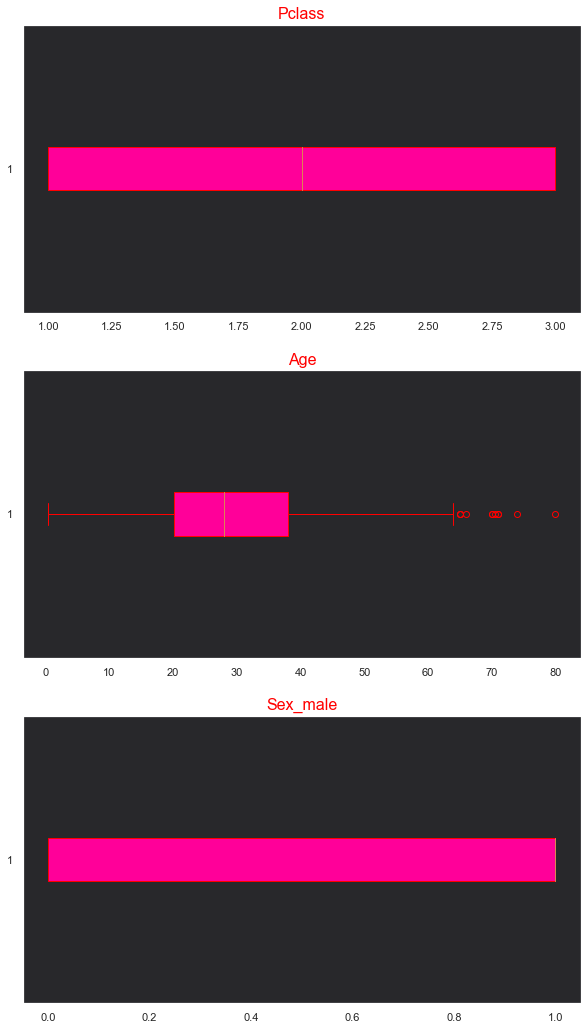

In [70]:
fig = plt.figure(figsize=(10,18))

for i in range(3):
    ax = fig.add_subplot(3,1,i+1)
    #sns.boxplot(df[l[i]], color='#FF0099', ax=ax)
    ax.boxplot(df[l[i]],vert=False, patch_artist=True,boxprops=dict(facecolor='#FF0099', color='red'),capprops=dict(color='red'),whiskerprops=dict(color='red'),flierprops=dict(color='red', markeredgecolor='red') )
    ax.set_title(l[i],color='red',size=16)
    ax.set_facecolor('#28282B')

### There are some outliers in 'Age' column.

## 
## Create a variable with all independent columns
## & other with dependent column (Target Column)

In [71]:
#X = pd.DataFrame([df['Pclass'],df['Age'],df['Sex_male']]).transpose().to_numpy()
#Y = df['Survived'].to_numpy()

X = pd.DataFrame([df['Pclass'],df['Age'],df['Sex_male']]).transpose()
Y = df['Survived']

In [72]:
X

,Pclass,Age,Sex_male
0,3.0,22.0,1.0
1,1.0,38.0,0.0
2,3.0,26.0,0.0
3,1.0,35.0,0.0
4,3.0,35.0,1.0
...,...,...,...
885,3.0,39.0,0.0
886,2.0,27.0,1.0
887,1.0,19.0,0.0
889,1.0,26.0,1.0


In [73]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

## Check the mean of every column

In [74]:
X.mean(axis=0)

Pclass       2.236695
Age         29.699118
Sex_male     0.634454
dtype: float64

## Check the standard deviation of every column

In [75]:
X.std(axis=0)

Pclass       0.838250
Age         14.526497
Sex_male     0.481921
dtype: float64

### As from the data above, we can see that all columns are not in one scale.. and model will find difficulty to understand the scale difference..

### Difference between mean and std is very high.. We need to transform our data

## 
## Robust Scaler to transform data

In [76]:
rs = RobustScaler()

In [77]:
X = rs.fit_transform(X)

### Now, we can see the mean and standard deviation is very close to each other

In [78]:
X.mean(axis=0)

array([ 0.11834734,  0.09505553, -0.36554622])

In [79]:
X.std(axis=0)

array([0.41883132, 0.81210188, 0.48158299])

## 
## Split the datasets into 'Train' & 'Test' sets

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

### Check shape of training and testing sets

In [81]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(571, 3)
(143, 3)
(571,)
(143,)


## Check the Null Hypothesis

### We will use t-test to check our p-value and determine the null hypothesis

In [82]:
ttest = {}

for i in range(X_train.shape[1]):
    xm = X[:,i].mean(axis=0)
    #print(xm)
    st,pvalue = stats.ttest_1samp(a=X_train[:,i],popmean=xm)
    
    if pvalue <= 0.05:
        #print('Reject')
        ttest[l[i]] = [st,pvalue,'Reject'] 
    else:
        #print('Accept')
        ttest[l[i]] = [st,pvalue,'Accept'] 
    
ttest = pd.DataFrame(ttest,index=['Statistic','Pvalue','Accept/Reject'])
ttest.T

,Statistic,Pvalue,Accept/Reject
Pclass,0.0925026,0.926331,Accept
Age,0.401609,0.688122,Accept
Sex_male,1.12077,0.262858,Accept


### We can see, by the 'Pvalue', we can accept all the null hypothesis

## 
## Check the Displot again (For Training dataset)

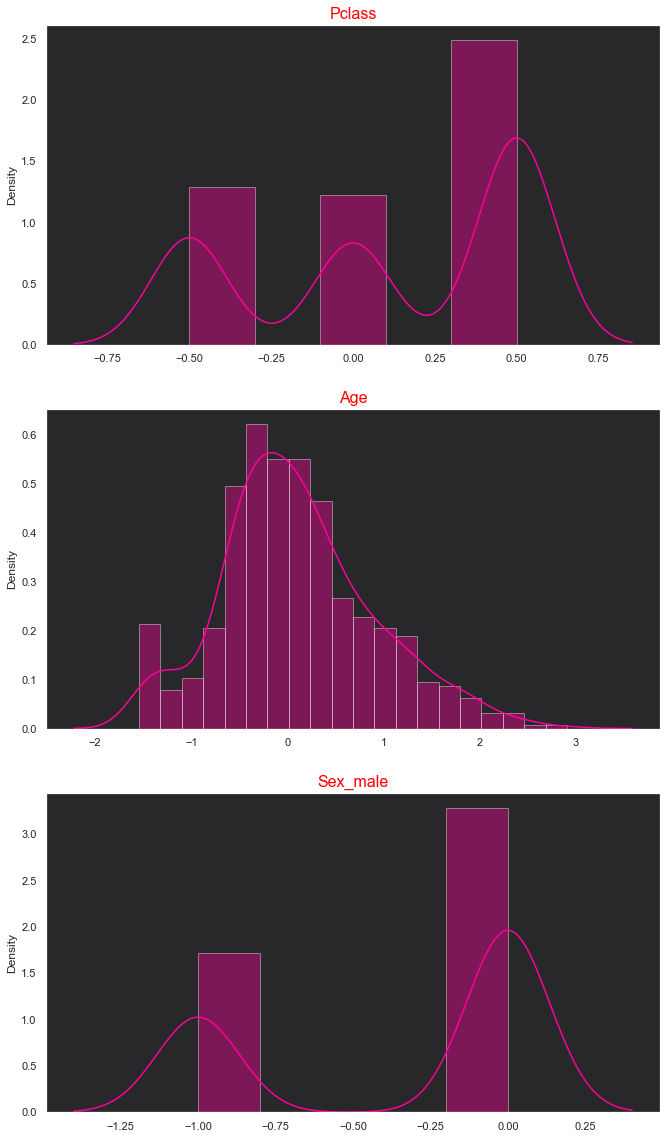

In [83]:
fig,axes = plt.subplots(3,1,figsize=(11,20))

l = ['Pclass','Age','Sex_male']

for i,ax in enumerate(axes.ravel()):
    sns.distplot(X_train[:,i], color='#FF0099' ,ax=ax)
    ax.set_title(l[i],color='red',size=16)
    ax.set_facecolor('#28282B')

# 
# Train the models

### SVC Linear kernel

In [84]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, Y_train)
Y_predict_linear = svc_linear.predict(X_test)

### SVC Gaussian rbf

In [85]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, Y_train)
Y_predict_rbf = svc_rbf.predict(X_test)

### Decision Tree

In [86]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

Y_predict = decision_tree.predict(X_test)

## 
## Check the predicted data and compare

In [87]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
     'SVC Linear':Y_predict_linear[:7],
     'SVC Gaussian RBF':Y_predict_rbf[:7],
     'Decision Tree':Y_predict[:7] }
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,SVC Linear,SVC Gaussian RBF,Decision Tree
548,Value1,0,0,0,0
816,Value2,0,1,0,1
640,Value3,0,0,0,0
18,Value4,0,1,0,1
9,Value5,1,1,1,1
323,Value6,1,1,1,1
179,Value7,0,0,0,0


### We can see there is not much difference in every algorithm's output

# 
# Evaluation Matrix

In [88]:
matrix_evaluation = pd.DataFrame({'Kernal' :['SVC Linear','SVC Gaussian RBF','Decision Tree'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict_linear),
                                        mean_absolute_error(Y_test,Y_predict_rbf),
                                        mean_absolute_error(Y_test,Y_predict),
                                       ], 
                                'MSE': [mean_squared_error(Y_test,Y_predict_linear),
                                        mean_squared_error(Y_test,Y_predict_rbf),
                                        mean_squared_error(Y_test,Y_predict)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict_linear)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_rbf)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict))],
                                    'R2_score': [r2_score(Y_test,Y_predict_linear),
                                                 r2_score(Y_test,Y_predict_rbf),          
                                                 r2_score(Y_test,Y_predict)],
                                 'Accuracy Score': [accuracy_score(Y_test,Y_predict_linear),
                                                   accuracy_score(Y_test,Y_predict_rbf),
                                                   accuracy_score(Y_test,Y_predict)] })


matrix_evaluation

,Kernal,MAE,MSE,RMSE,R2_score,Accuracy Score
0,SVC Linear,0.174825,0.174825,0.418121,0.266215,0.825175
1,SVC Gaussian RBF,0.188811,0.188811,0.434524,0.207512,0.811189
2,Decision Tree,0.174825,0.174825,0.418121,0.266215,0.825175


### By evaluation matrix, it is clear that SVC Gaussian rbf is most accurate algorithm.
### It gives less errors as compared to Decision Tree.

# 
# Confusion Matrix

In [89]:
labels = ['Dead','Survived']

cml = confusion_matrix(Y_test, Y_predict_linear)
cmg = confusion_matrix(Y_test, Y_predict_rbf)
cms = confusion_matrix(Y_test, Y_predict)


print("\nConfusion matrix of SVC Linear Kernel:\n",cml)
print("\n\nConfusion matrix of SVC Gaussian rbf Kernel:\n",cmg)
print("\n\nConfusion matrix of Decision Tree:\n",cms)


Confusion matrix of SVC Linear Kernel:
 [[70 17]
 [ 8 48]]


Confusion matrix of SVC Gaussian rbf Kernel:
 [[77 10]
 [17 39]]


Confusion matrix of Decision Tree:
 [[75 12]
 [13 43]]


### SVC Gaussian gives more True values than others

## 
## Visualization of Confusion Matrix

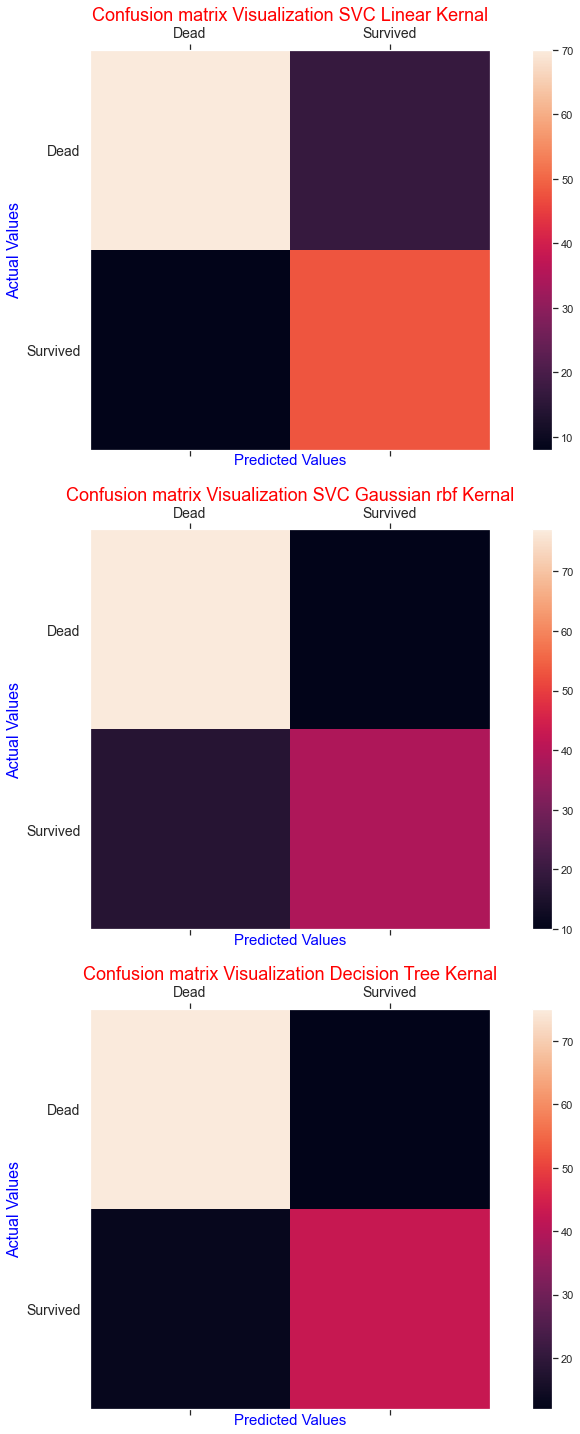

In [90]:
cm = [cml,cmg,cms]
kname = ['SVC Linear','SVC Gaussian rbf','Decision Tree']


fig = plt.figure(figsize=(15,25))

for i in range(0,3):
    axes = fig.add_subplot(3,1,i+1)
    mv = axes.matshow(cm[i])
    axes.set_title('Confusion matrix Visualization '+kname[i]+' Kernal',size=18,color='red')
    fig.colorbar(mv)
    axes.set_xticklabels([''] + labels,size='14')
    axes.set_yticklabels([''] + labels,size='14')
    axes.set_xlabel('Predicted Values',size='15',color='blue')
    axes.set_ylabel('Actual Values',size='16',color='blue')

## 
# Classification Report

In [91]:
crl = classification_report(Y_test,Y_predict_linear,target_names=labels)
crg = classification_report(Y_test,Y_predict_rbf,target_names=labels)
crs = classification_report(Y_test,Y_predict,target_names=labels)

print("\n\nClassification Report of SVC Linear Kernel: \n\n",crl)
print("\n\nClassification Report of SVC Gaussian rbf Kernel: \n\n",crg)
print("\n\nClassification Report of Decision Tree: \n\n",crs)



Classification Report of SVC Linear Kernel: 

               precision    recall  f1-score   support

        Dead       0.90      0.80      0.85        87
    Survived       0.74      0.86      0.79        56

    accuracy                           0.83       143
   macro avg       0.82      0.83      0.82       143
weighted avg       0.84      0.83      0.83       143



Classification Report of SVC Gaussian rbf Kernel: 

               precision    recall  f1-score   support

        Dead       0.82      0.89      0.85        87
    Survived       0.80      0.70      0.74        56

    accuracy                           0.81       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



Classification Report of Decision Tree: 

               precision    recall  f1-score   support

        Dead       0.85      0.86      0.86        87
    Survived       0.78      0.77      0.77        56

    accuracy                     

# 
# Predication Time..!
### Choose random data and check the output

#### Check the independent data

In [92]:
X[random_num]

array([ 0.5       ,  0.27972028, -1.        ])

In [93]:
import random 
random.seed(1234)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(X))

# Selects a random column with random number we found above
trail = X[random_num]

trail

#df.loc[:,'Survived'][random_num]
#df.iloc[random_num]['Survived']

array([0.       , 1.9020979, 0.       ])

In [94]:
print(X_test.shape)
print(trail.shape)

(143, 3)
(3,)


#### Reshape the data

In [95]:
trail = trail.reshape(1,-1)
trail.shape

(1, 3)

### Predict and Compare it with every Algorithm

In [96]:
Y.iloc[random_num]

1

In [97]:
pred = pd.DataFrame({'Type': ['Actual value', 'SVC Linear', 'SVC Gaussian rbf','Decision Tree'],
                         'Value': [Y.iloc[random_num], 
                                   svc_linear.predict(trail)[0],
                                   svc_rbf.predict(trail)[0],
                                   decision_tree.predict(trail)[0]
                                  ]})

pred

,Type,Value
0,Actual value,1
1,SVC Linear,0
2,SVC Gaussian rbf,0
3,Decision Tree,1


## 
# Compare model based on hypothesis testing

### 
## For our test dataset, we will use our two best algorithms among three which we used..
### We will check if they have probably same performance or different...

In [98]:
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=svc_rbf, estimator2=svc_linear, X=X_test, y=Y_test)
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

if p <= 0.05:
    print('\nDifference between performance is probably real')
else:
    print('\nAlgorithms probably have the same performance')

P-value: 0.170, t-Statistic: -1.604

Algorithms probably have the same performance


### 
### We can see that, the difference between the model performance is not much...
## We can use either of the model for our dataset.
## But by looking at the accuracy, we will use SVC Gaussian kernel model..